# Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [58]:
df=pd.read_csv('blackFriday_train.csv')

In [59]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [60]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.shape

(550068, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Cleaning Data 

#### Product Category 2,3 has lot of null values and they need to be treated

In [7]:
df['Product_Category_2']=df['Product_Category_2'].fillna(0)

In [8]:
df['Product_Category_3']=df['Product_Category_3'].fillna(0)

In [9]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

<AxesSubplot:>

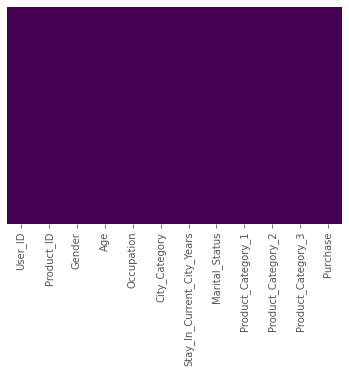

In [10]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df.drop_duplicates(inplace=True)

### we have dropped a significant amount of duplicates as well 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 54.6+ MB


# Exploratory Data Analysis

In [61]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


<AxesSubplot:>

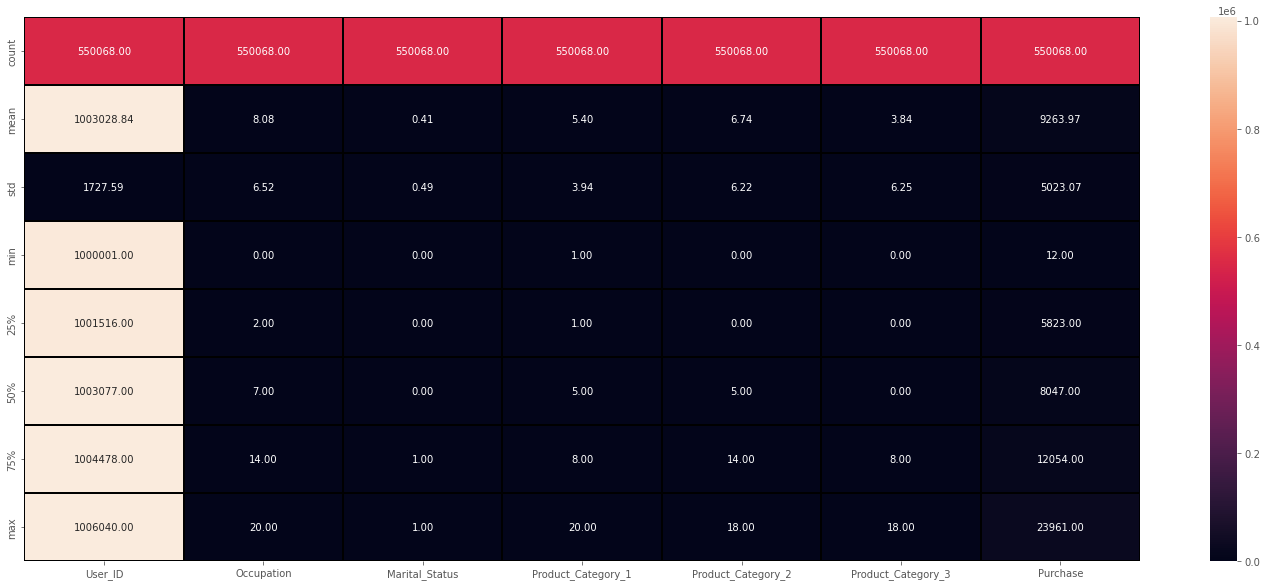

In [28]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

We have 5 categorical features : ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

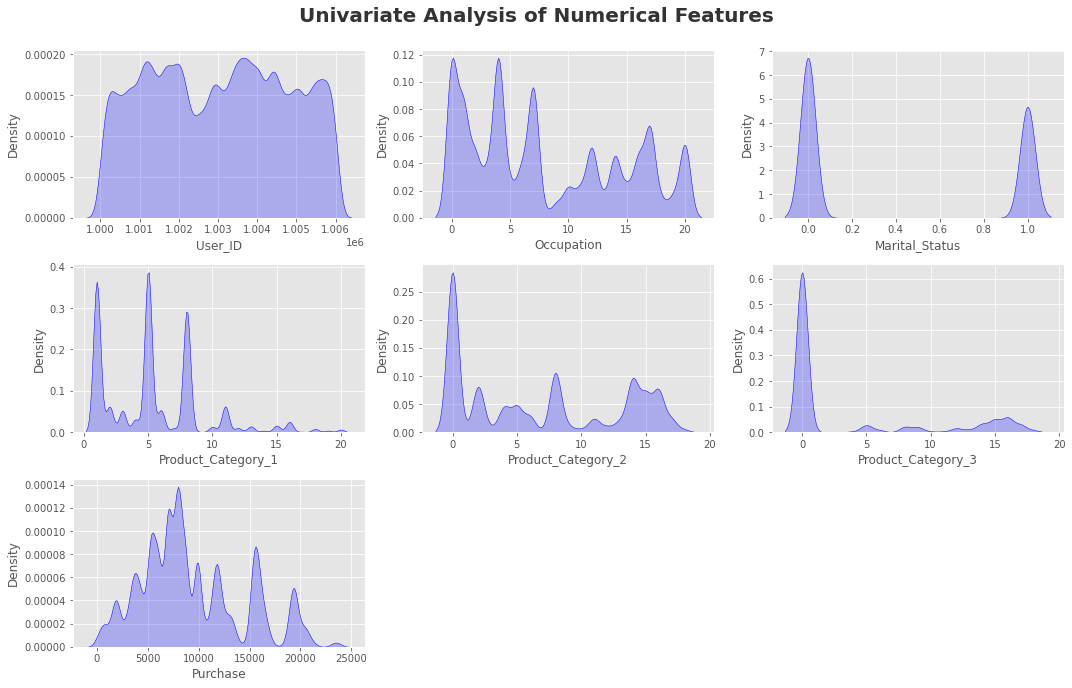

In [32]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Categorical Features

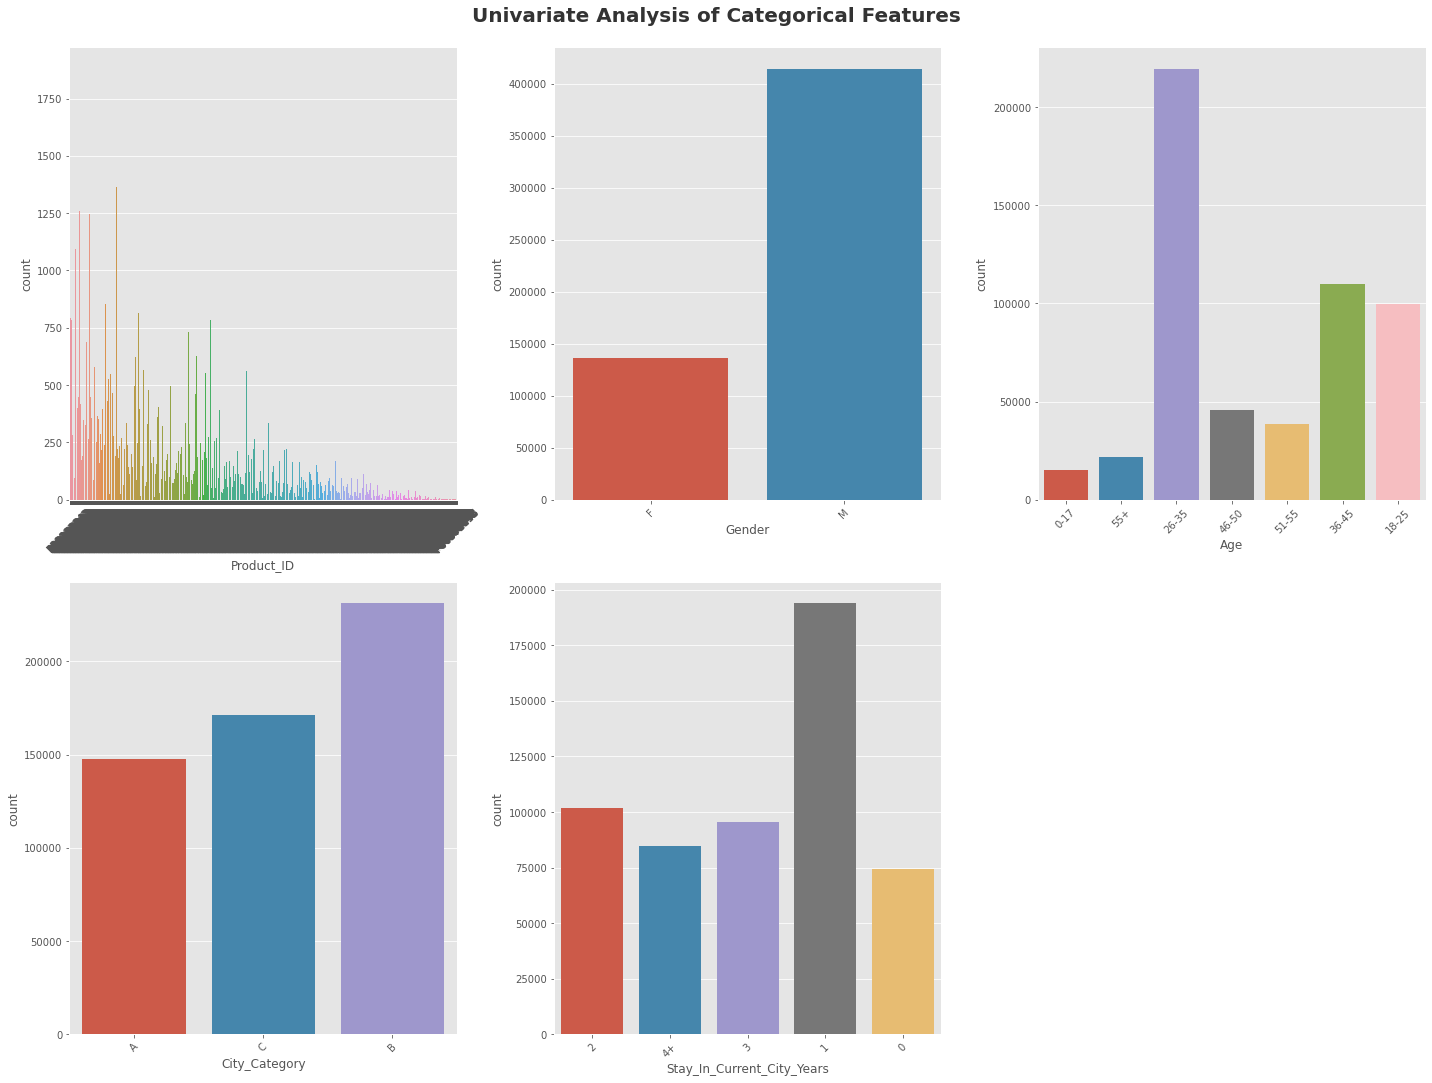

In [36]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for i in range(0, len(cat1)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Checking relationship of City with Price

In [16]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

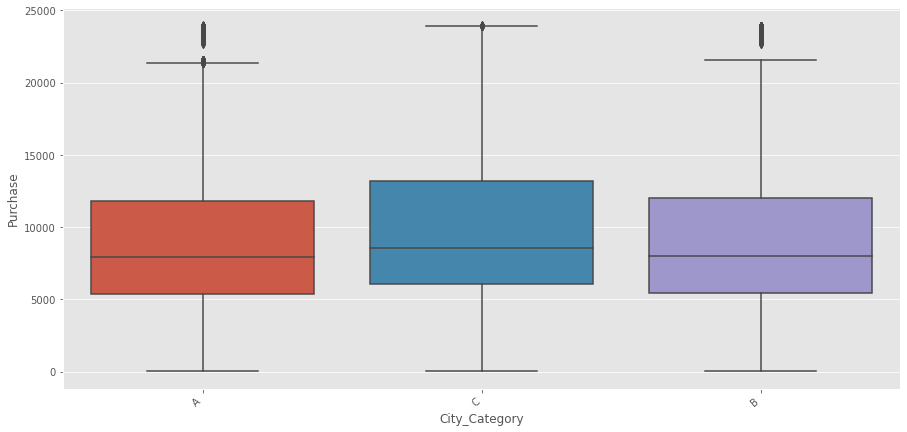

In [17]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='City_Category',y='Purchase',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

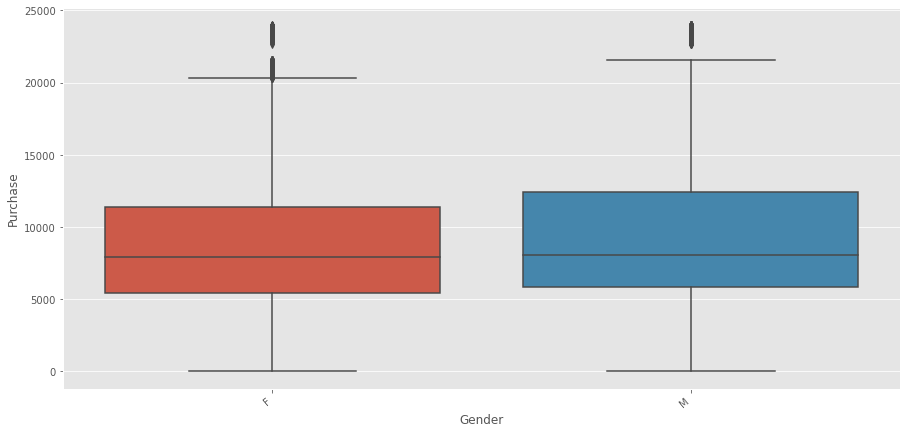

In [18]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Gender',y='Purchase',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

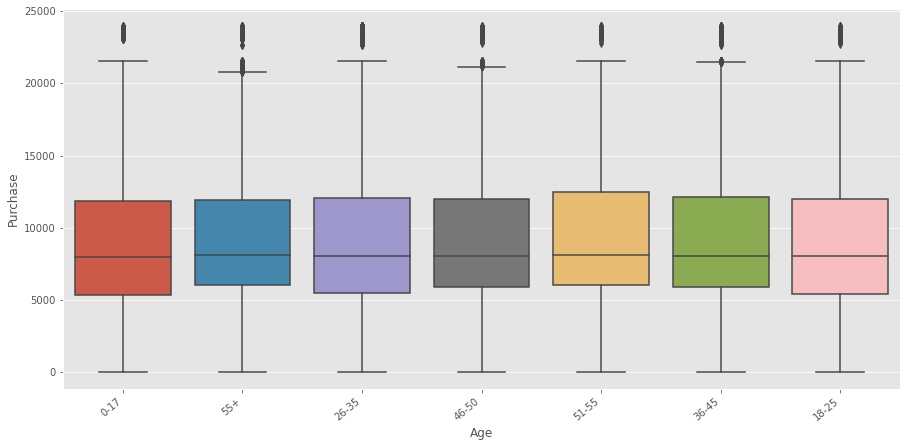

In [19]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Age',y='Purchase',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

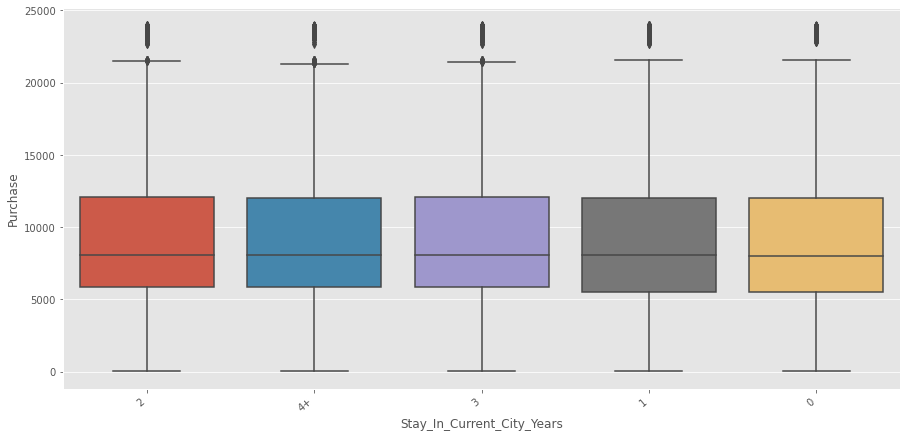

In [20]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Stay_In_Current_City_Years',y='Purchase',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

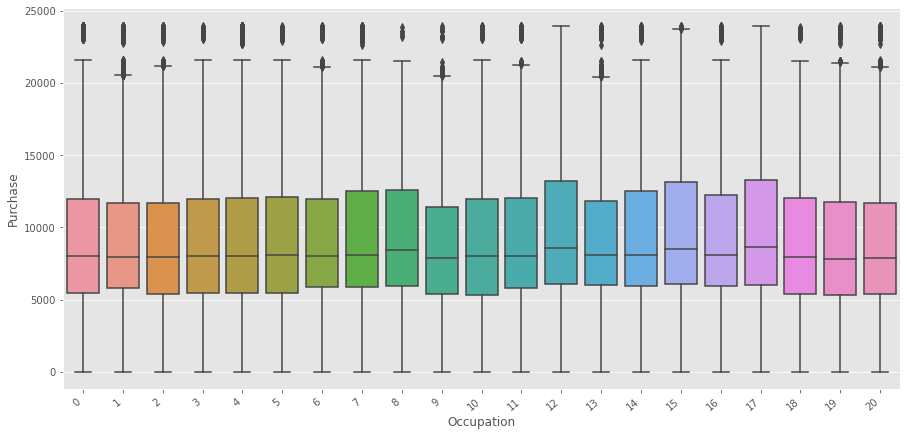

In [21]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Occupation',y='Purchase',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

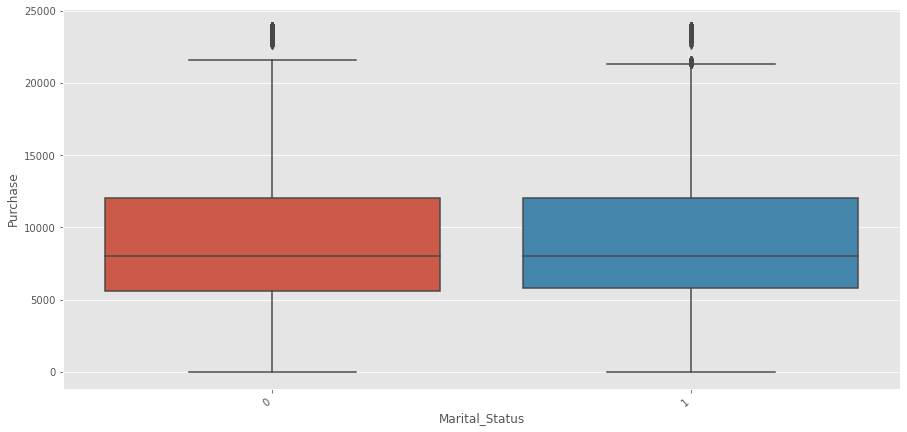

In [23]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Marital_Status',y='Purchase',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

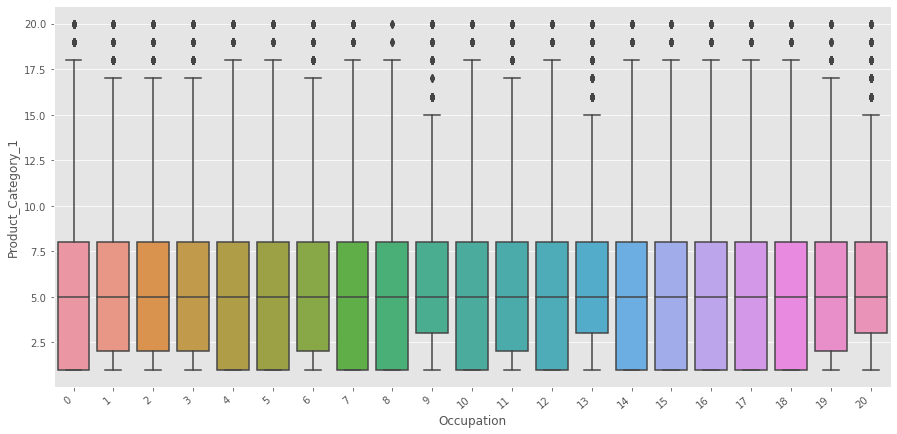

In [62]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Occupation',y='Product_Category_1',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

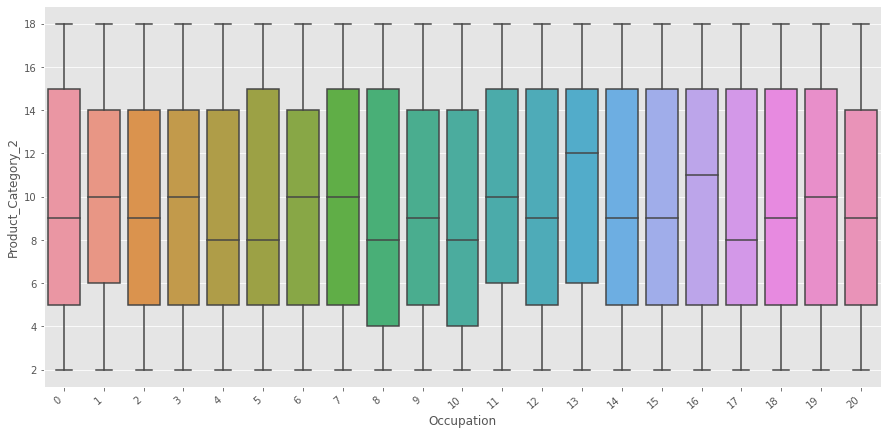

In [63]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Occupation',y='Product_Category_2',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

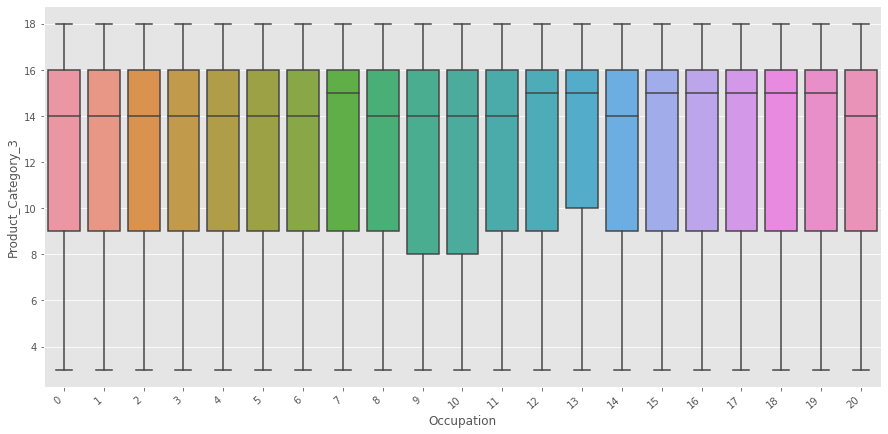

In [64]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Occupation',y='Product_Category_3',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Purchase',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship with Replot 

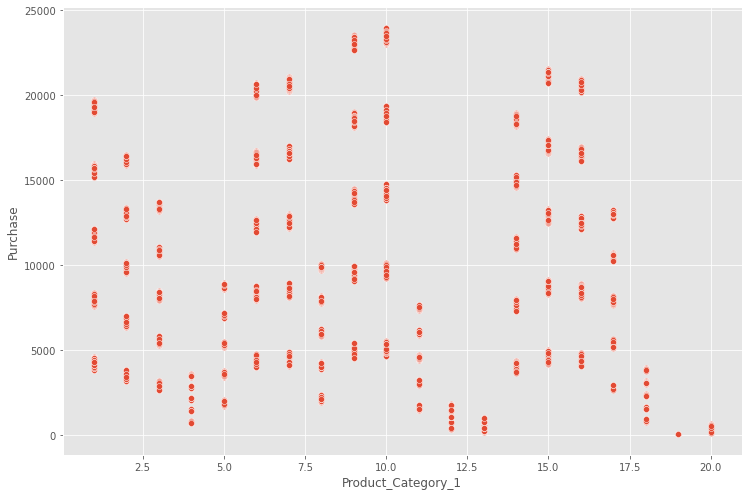

In [65]:
sns.relplot(x='Product_Category_1',y='Purchase',data=df,height=7,aspect=1.5)

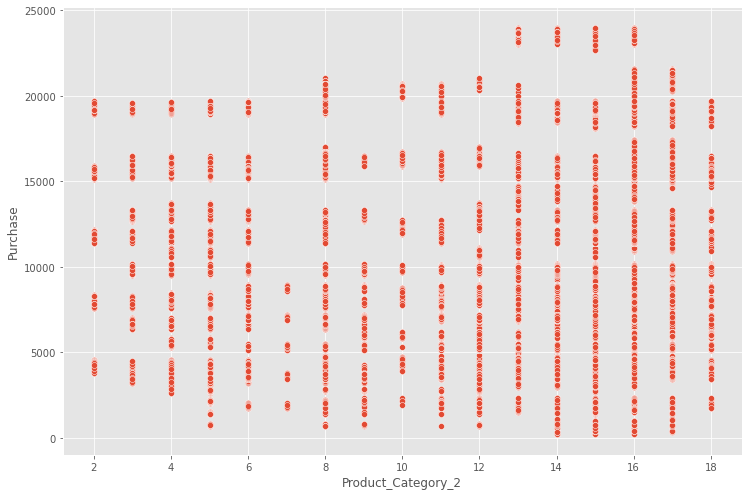

In [66]:
sns.relplot(x='Product_Category_2',y='Purchase',data=df,height=7,aspect=1.5)

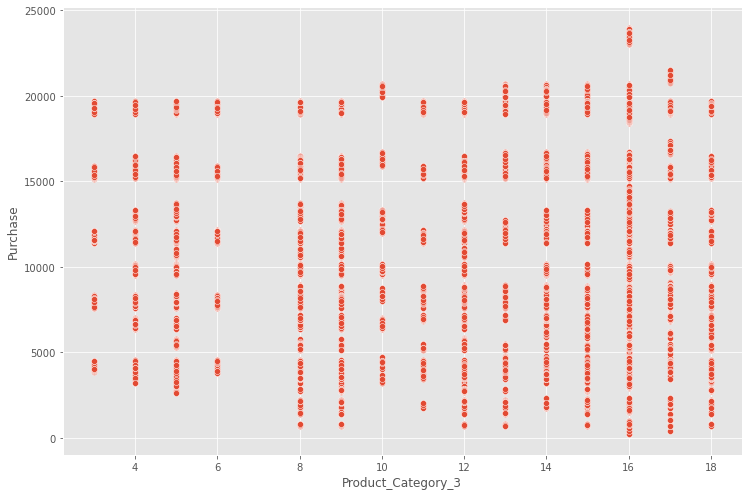

In [67]:
sns.relplot(x='Product_Category_3',y='Purchase',data=df,height=7,aspect=1.5)

### Relationship with Replot -contd

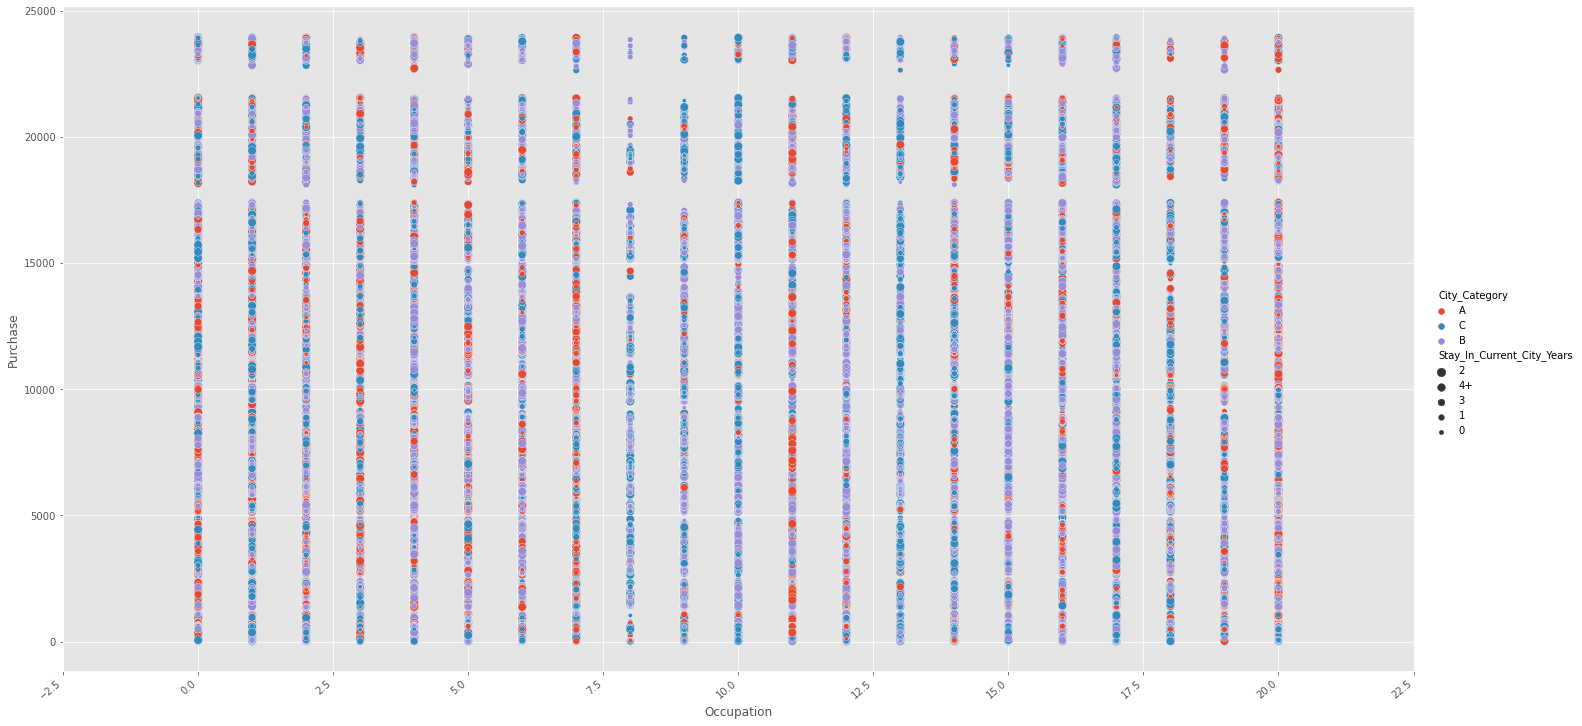

In [39]:
ax=sns.relplot(x='Occupation',y='Purchase',data=df,hue='City_Category',size='Stay_In_Current_City_Years',height=10,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

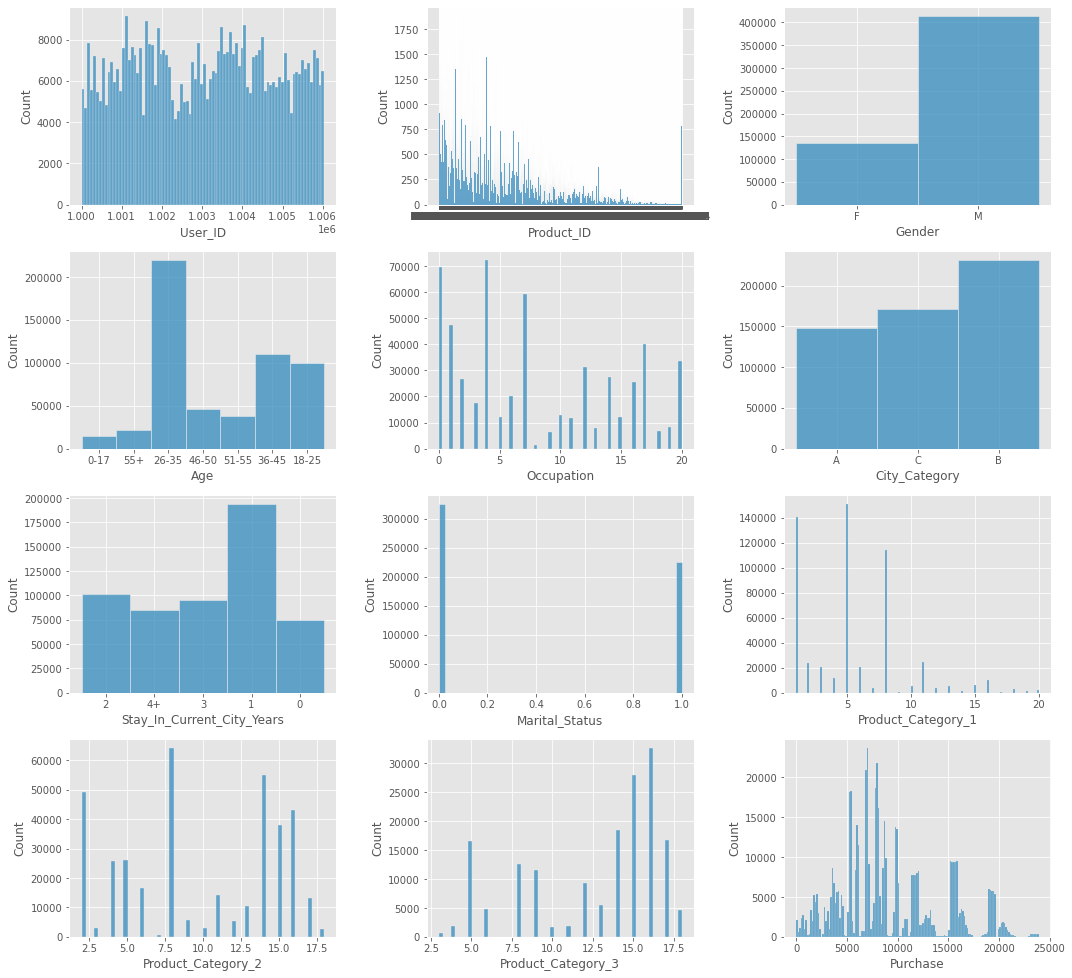

In [68]:
#Lets see how the data is distributed for every column

plt.figure(figsize =(15,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=12:
        ax = plt.subplot(6,3,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize = 12)
        
    plotnumber +=1
plt.tight_layout()

In [42]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### Extracting Training Data

In [43]:
#Divide data into features and label

X = df.drop(columns = ['Purchase'])
y = df['Purchase']

In [44]:
X

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,0.0
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,0.0
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,0.0
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,0.0


In [45]:
y.shape

(550068,)

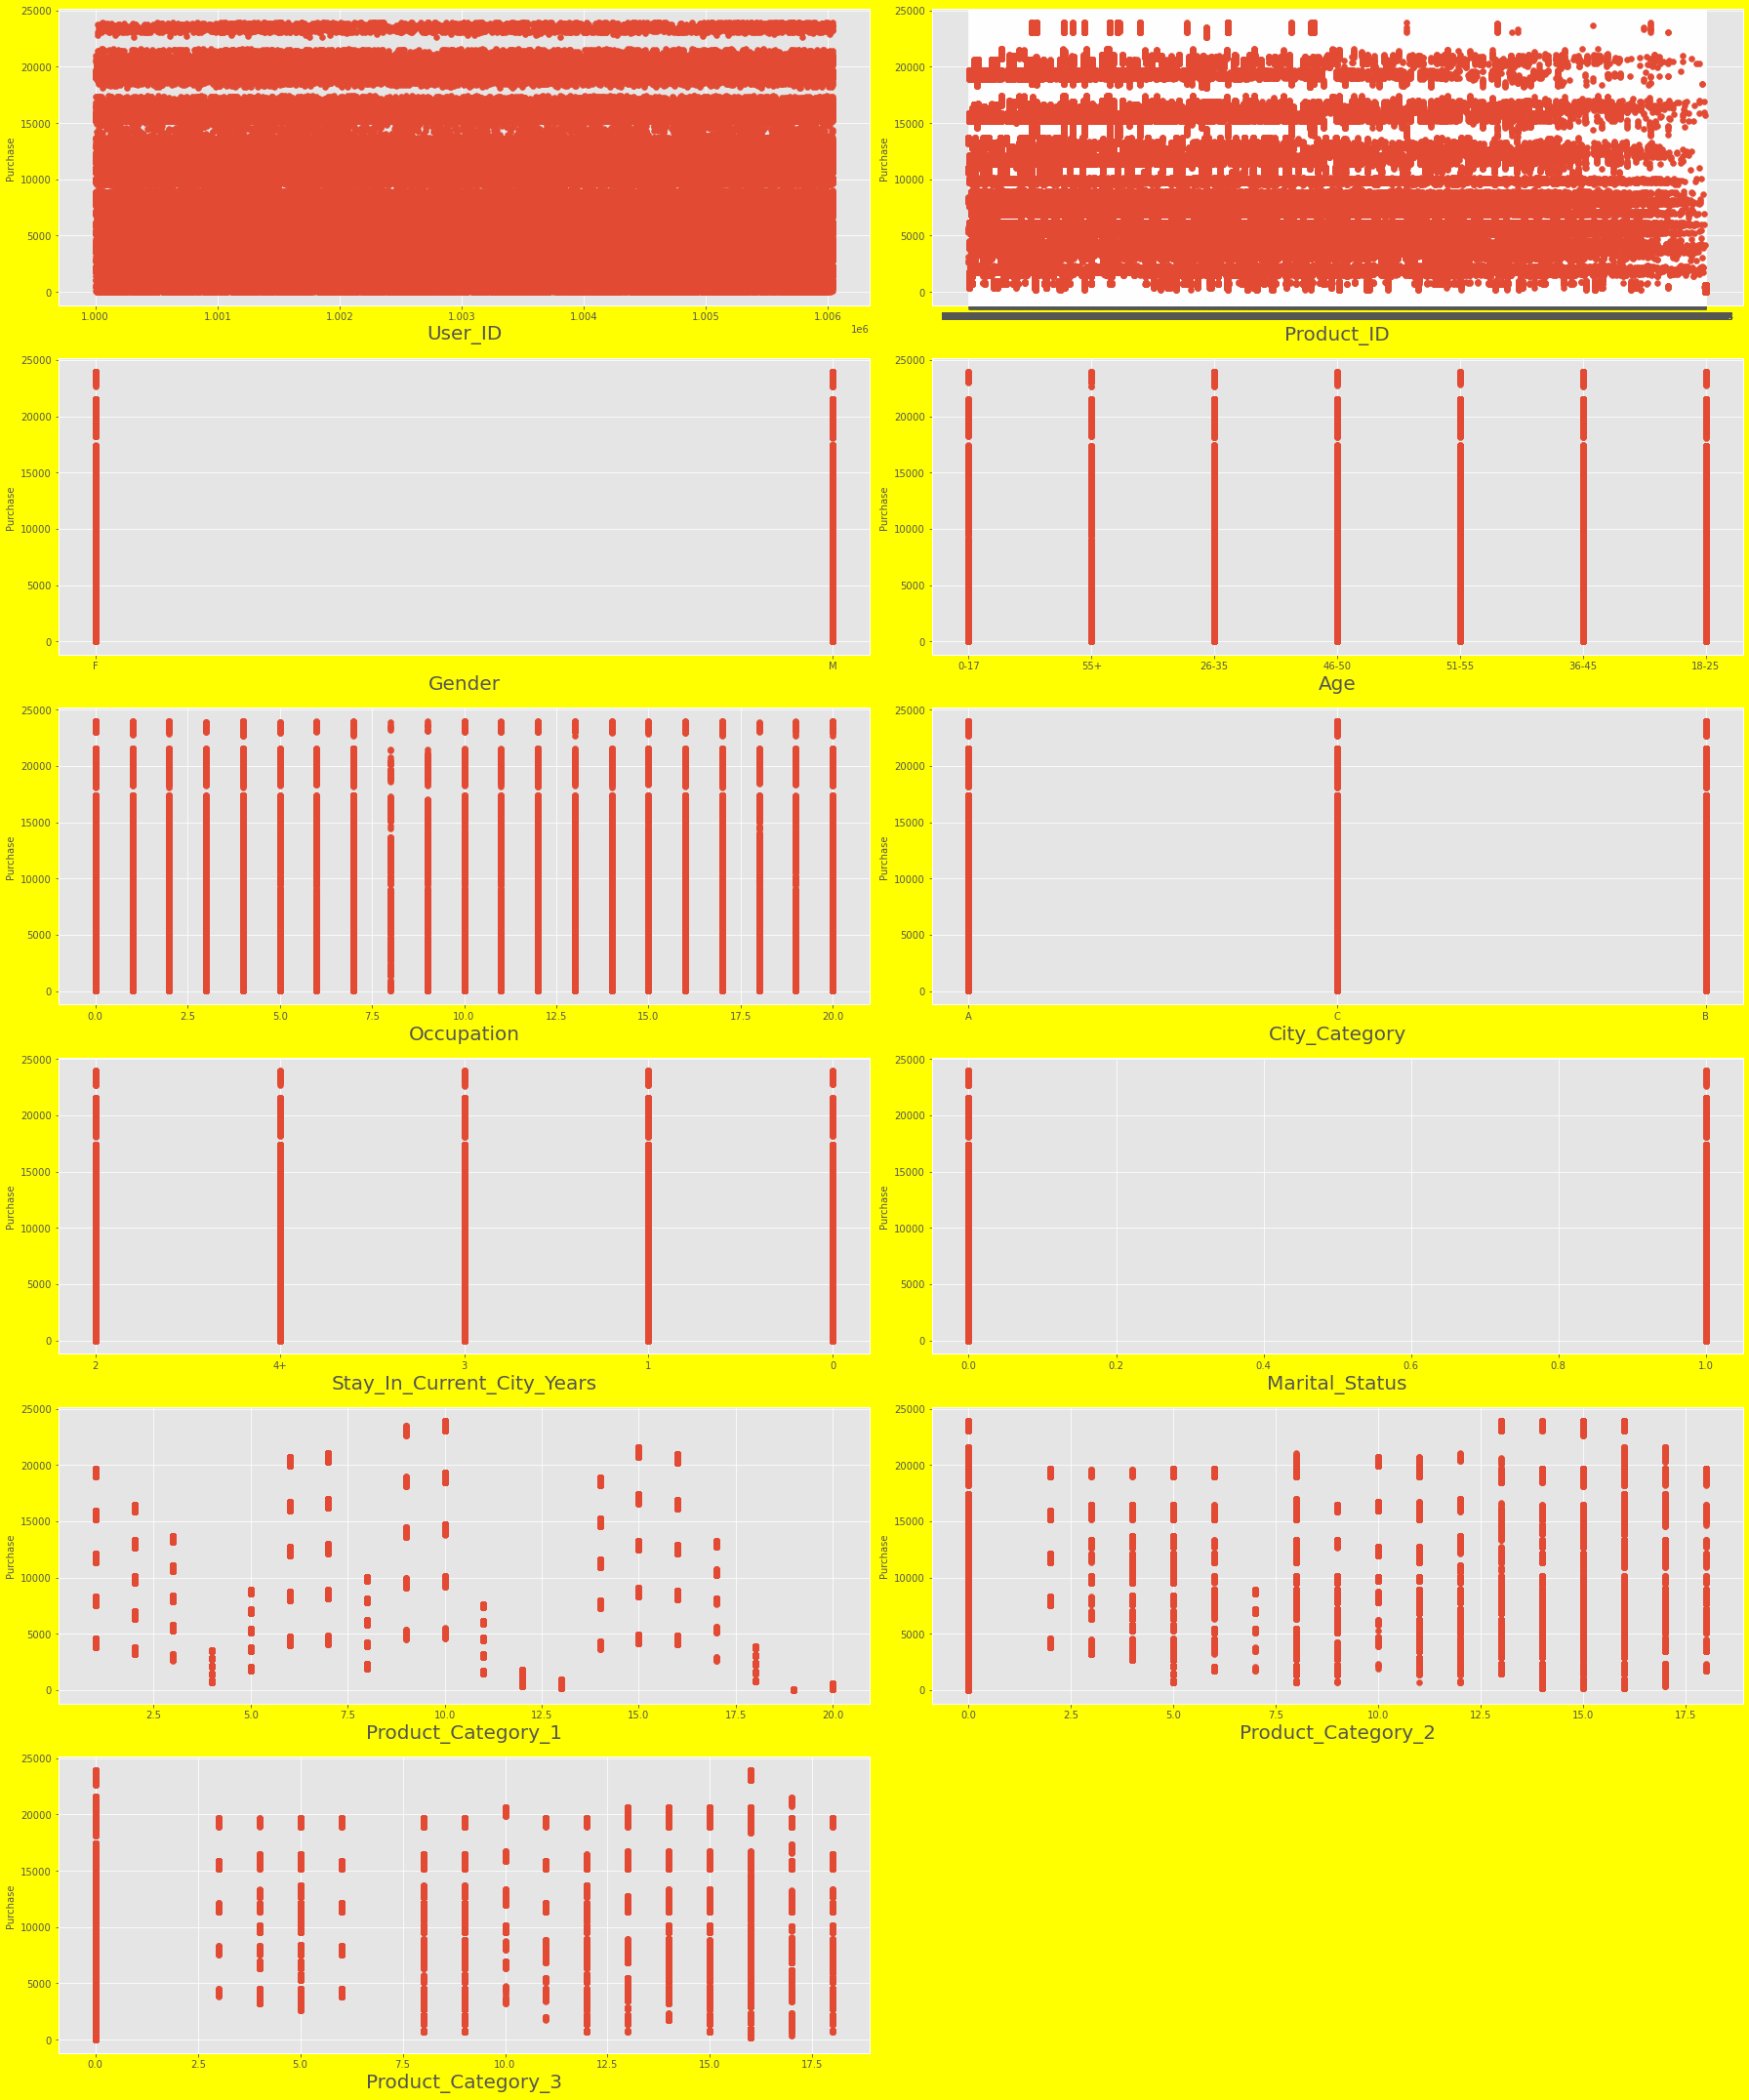

In [46]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship
import matplotlib.pyplot as plt
plt.figure(figsize =(25,30), facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <=11:
        ax = plt.subplot(6,2,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Purchase ',fontsize = 10)
    plotnumber +=1
plt.tight_layout()


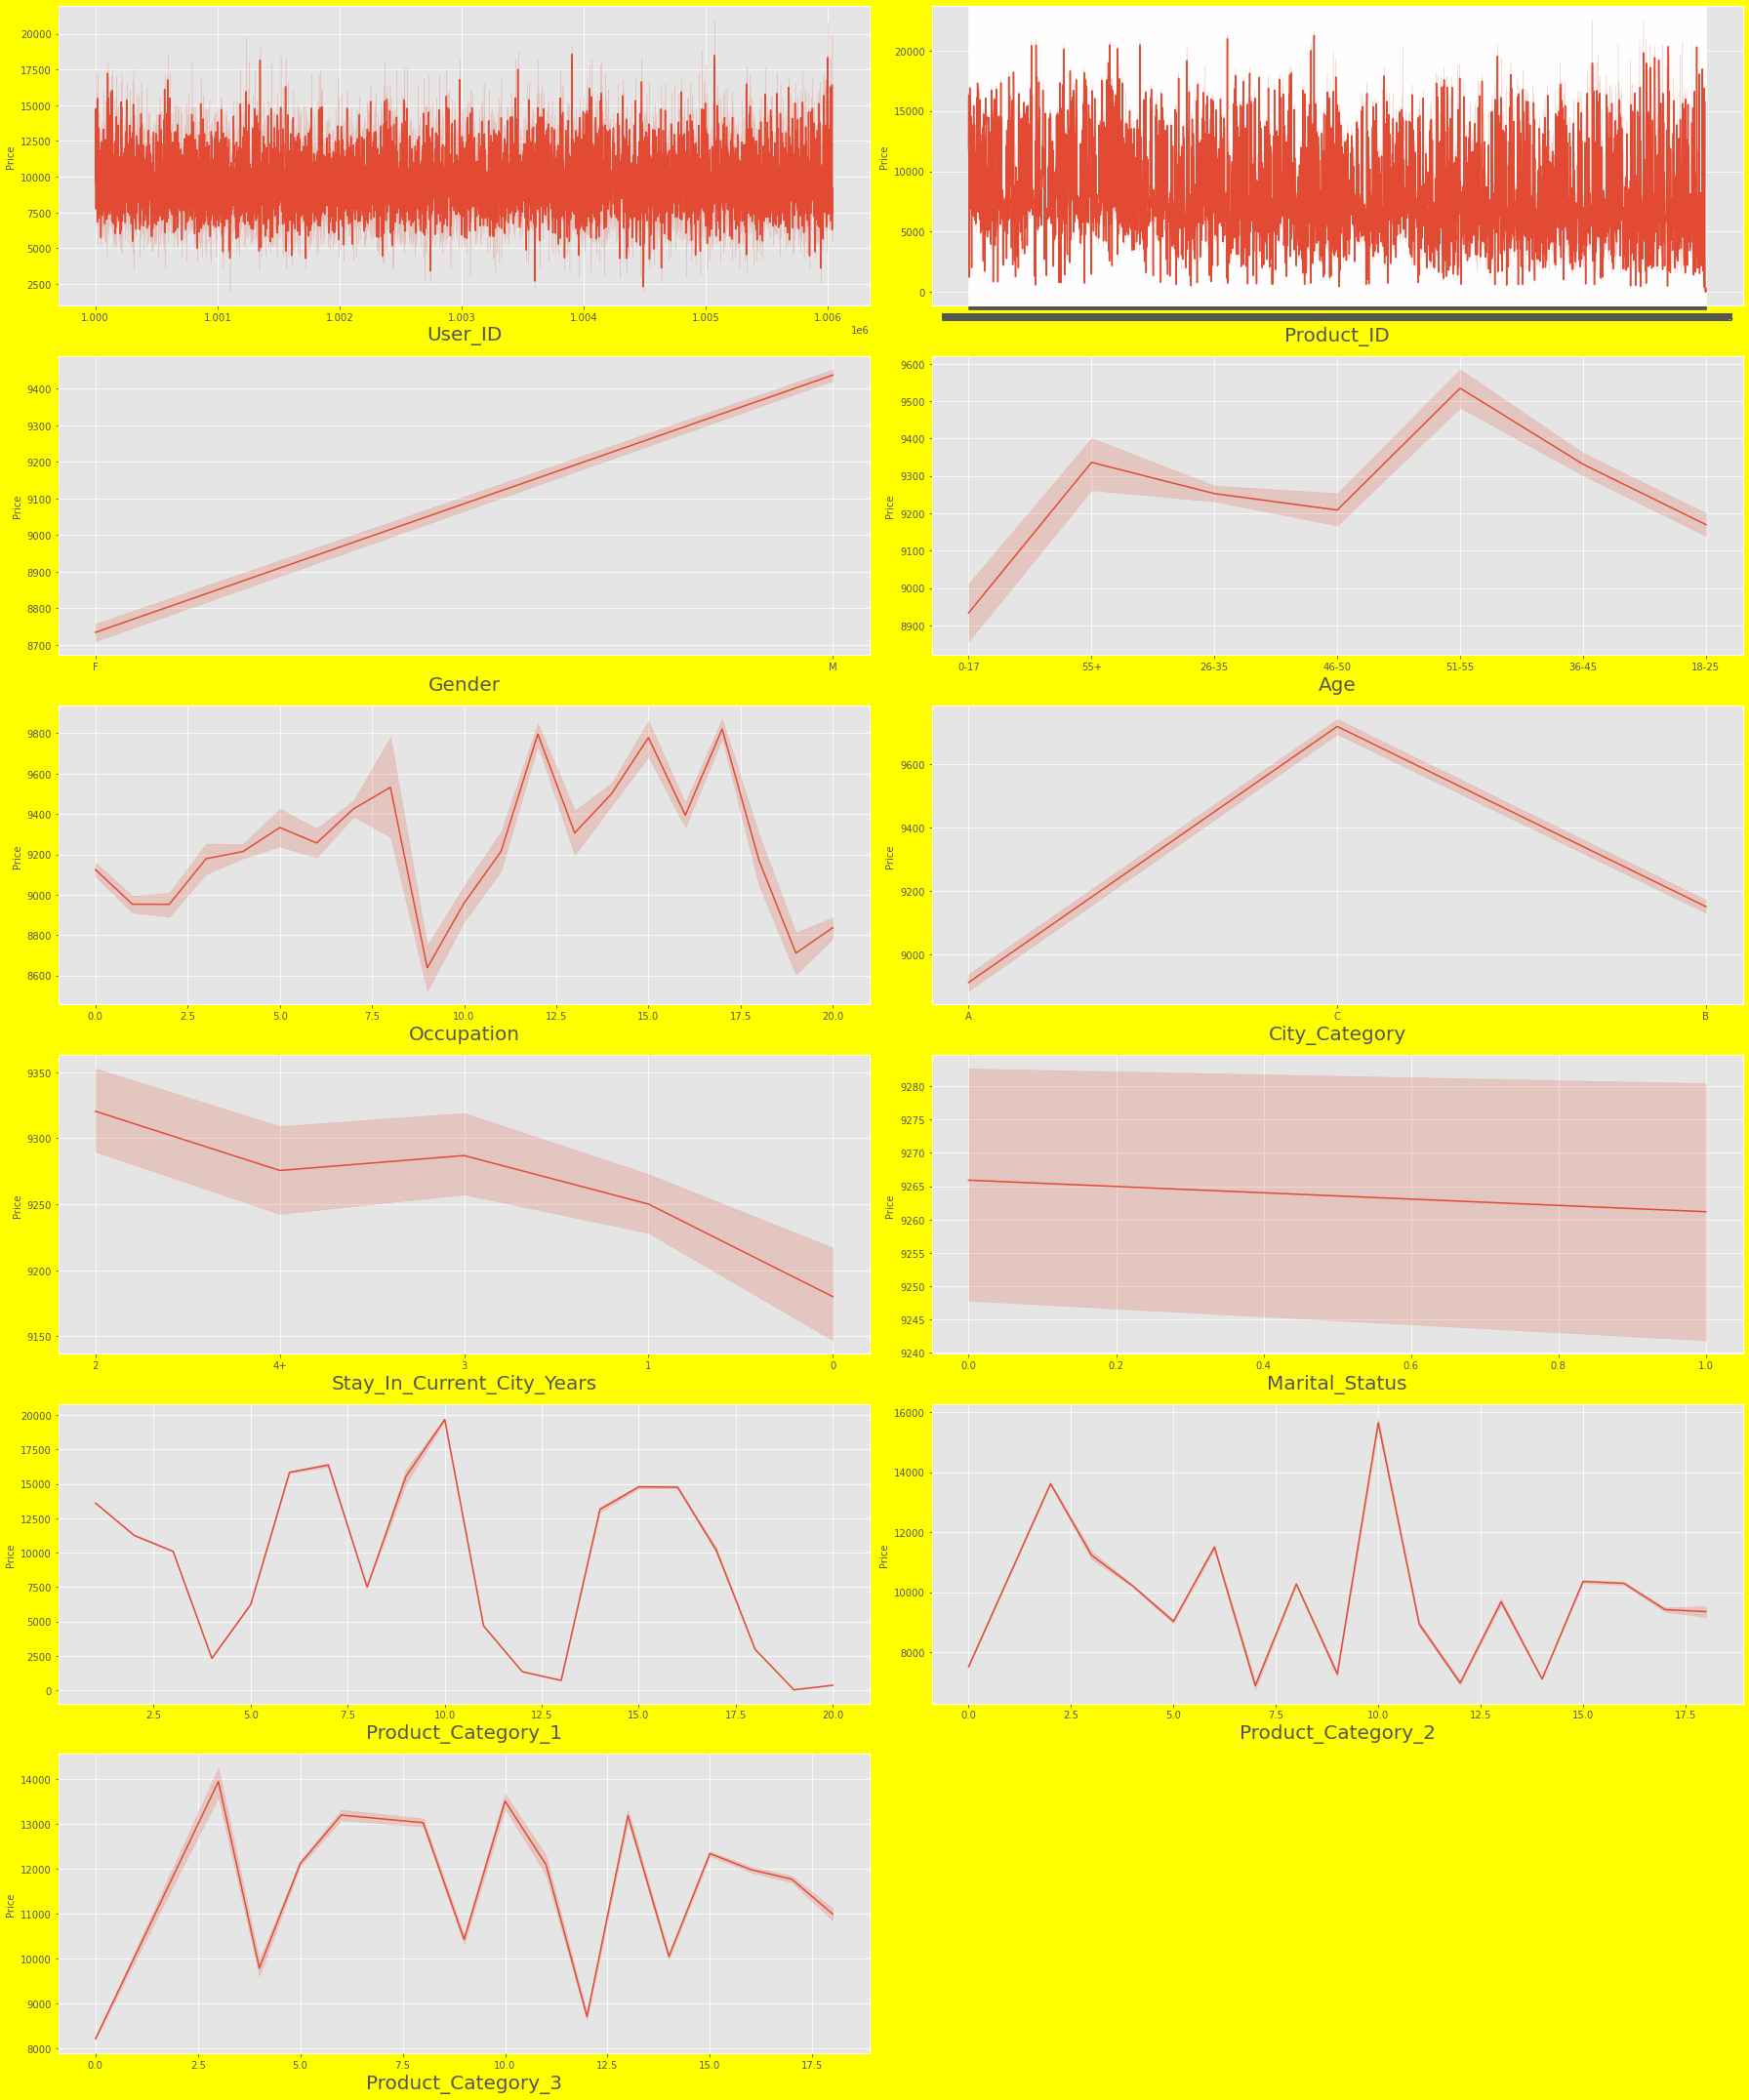

In [47]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship
import matplotlib.pyplot as plt
plt.figure(figsize =(25,30), facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <=11:
        ax = plt.subplot(6,2,plotnumber)
        sns.lineplot(X[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Price ',fontsize = 10)
    plotnumber +=1
plt.tight_layout()


# Correlation of the columns with the Purchase as in Label

In [48]:
df.corr()['Purchase'].sort_values()

Product_Category_1   -0.343703
Marital_Status       -0.000463
User_ID               0.004716
Occupation            0.020833
Product_Category_2    0.052288
Product_Category_3    0.288501
Purchase              1.000000
Name: Purchase, dtype: float64

<AxesSubplot:>

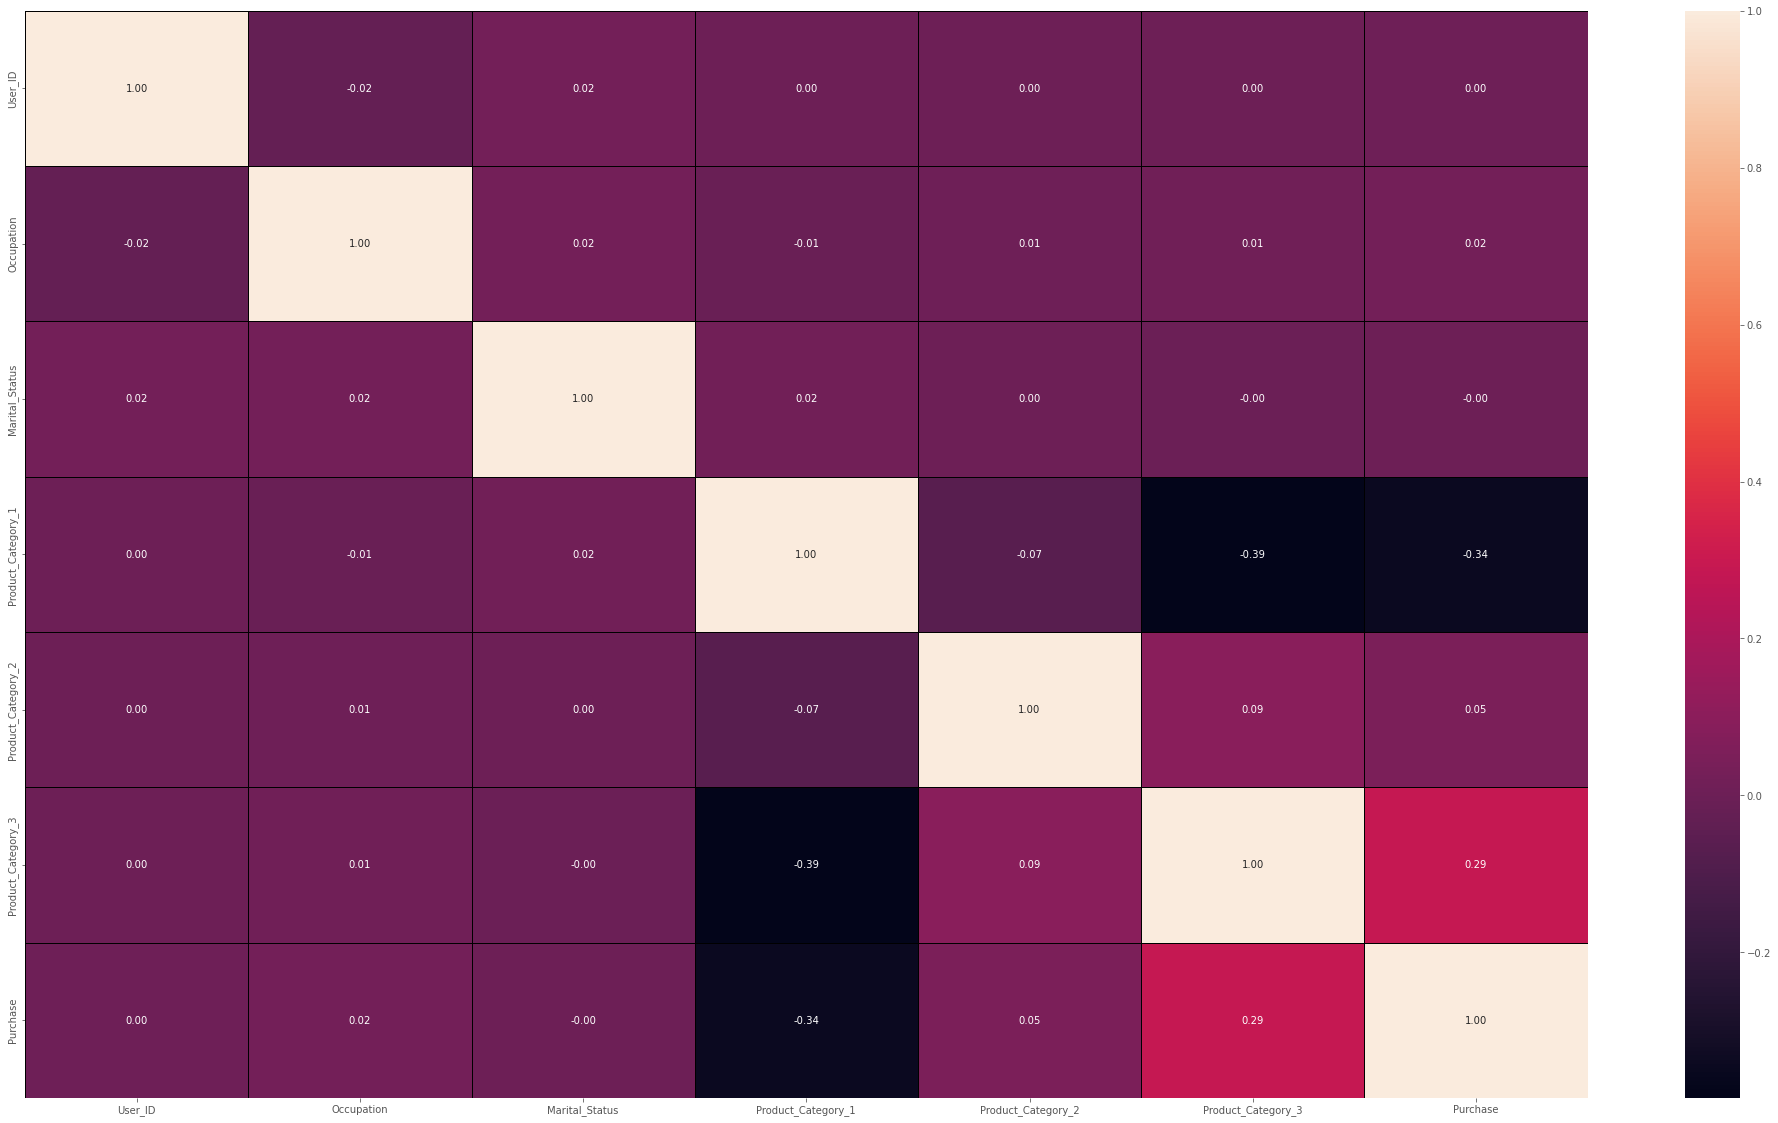

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black', fmt='.2f')

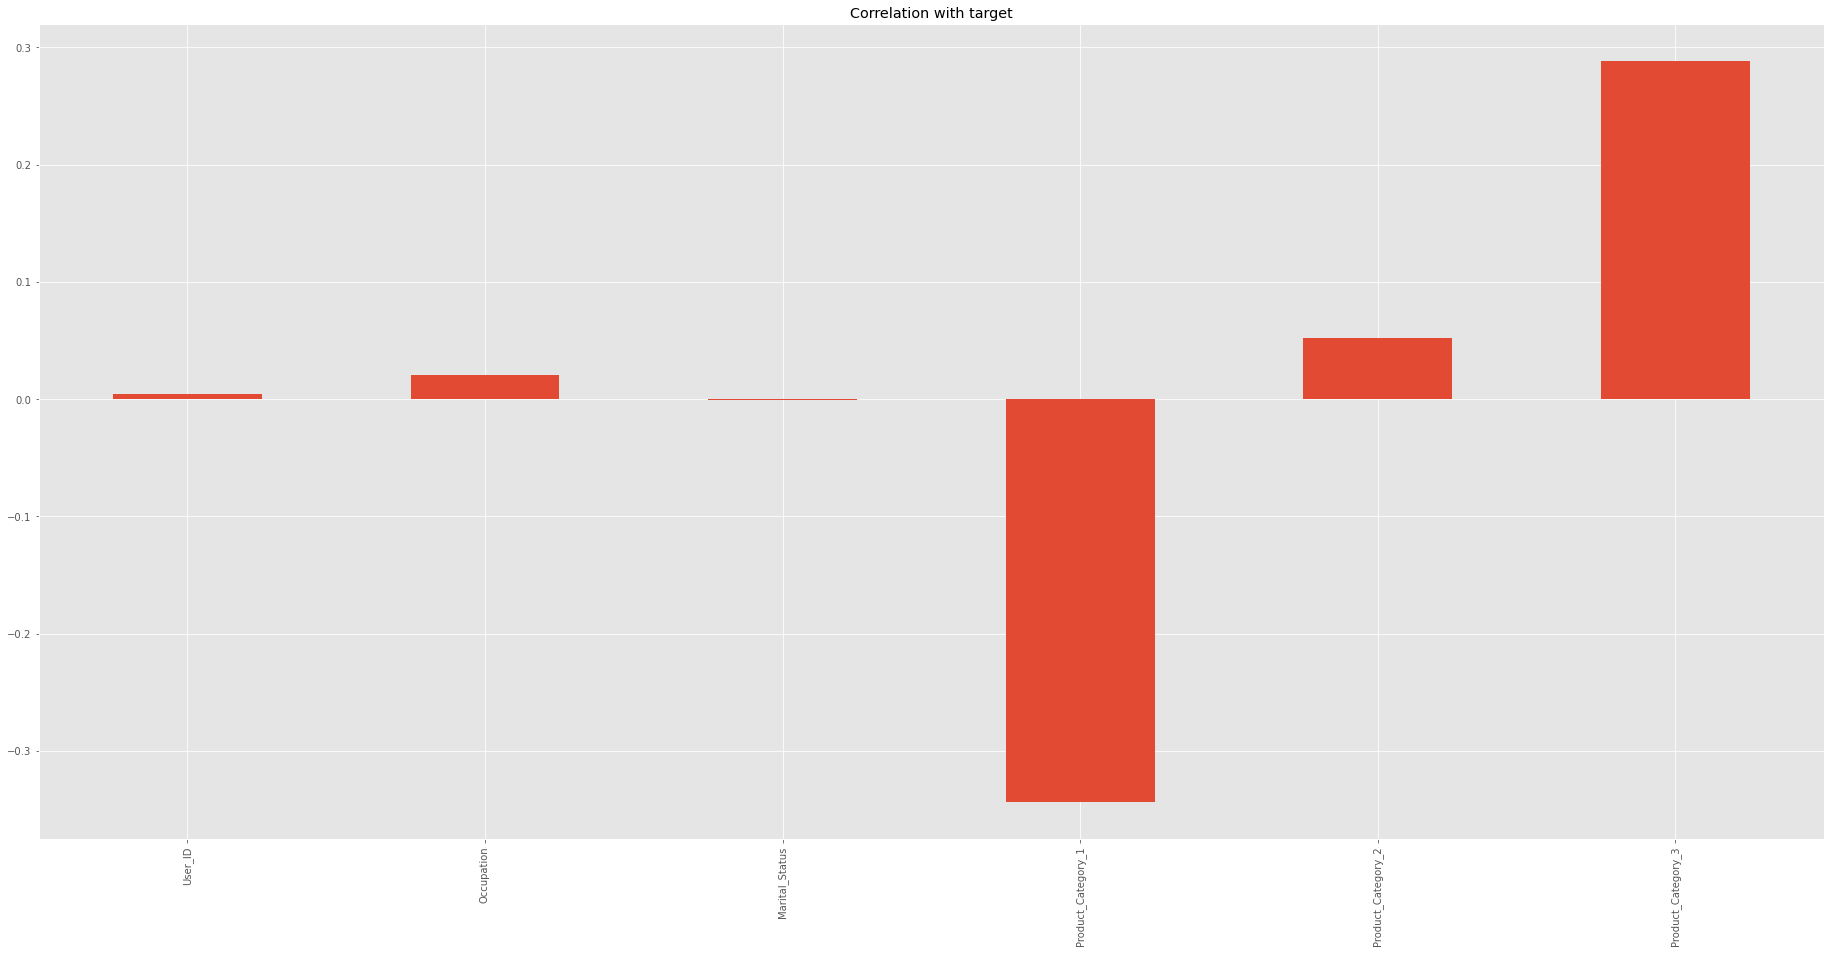

In [50]:
# Plotting a barplot to see the relationship with  label in a better way

df.drop('Purchase', axis=1).corrwith(df['Purchase']).plot(kind='bar', grid=True,figsize=(32,15),
                                                  title='Correlation with target')

plt.show()